This notebook has been adapted from https://www.kaggle.com/code/prashant111/matplotlib-tutorial-for-beginners

### **Content**
1. [The Figure](#1)
2. [Subplots](#2)
3. [Line Plots](#3)
    - [Exercise 1](#ex1)
4. [Bar Plots](#4)
    - [Exercise 2](#ex2)
5. [Tick Labels and Axis Labels](#5)
    - [Exercise 3](#ex3)

In [30]:
# Before we start, let's import the libraries that will be used in later of this tutorials.
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
# Don't worry if you don't know how to use numpy, pandas and seaborn, I will explain them in details in other notebooks.

### **Dataset for this tutorial**

In [31]:
# Before we start anything, let's create some sample data for our plotting.

In [32]:
# set random seed so that you could have the exactly same results as mine.
np.random.seed(0)

df = pd.DataFrame(data={'a':np.random.randint(0, 100, 30),
                        'b':np.random.randint(0, 100, 30),
                        'c':np.random.randint(0, 100, 30)})
df.head()

,a,b,c
0,44,47,17
1,47,64,79
2,64,82,4
3,67,99,42
4,67,88,58


<a id="1"></a> <br>
# 1. THE FIGURE
The figure acts as a container for the graph. It has properties such as size (`figsize`), and methods such as `Figure.show()` or `Figure.save_fig()`.
Each time you call the `matplotlib.pyplot.figure` function, a new figure will be created.

In [33]:
# Let's create a figure and call it fig.
fig = plt.figure()
# This will return an empty figure.

<Figure size 640x480 with 0 Axes>

In [34]:
# Let's create a figure with figsize (15, 8) and also call it fig (thus overwriting the reference to the previous fig).
# The 15x8 figsize is arbitrary, but I use it as a standard size to work with for visibility.
fig = plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<a id="2"></a> <br>
# 2. SUBPLOTS (AXES)

An empty figure is a bit boring. Now you can write directly to the figure using `matplotlib.pyplot` methods, but it's generally easier and safer to draw these inside individual subplots (axes) within the graph.

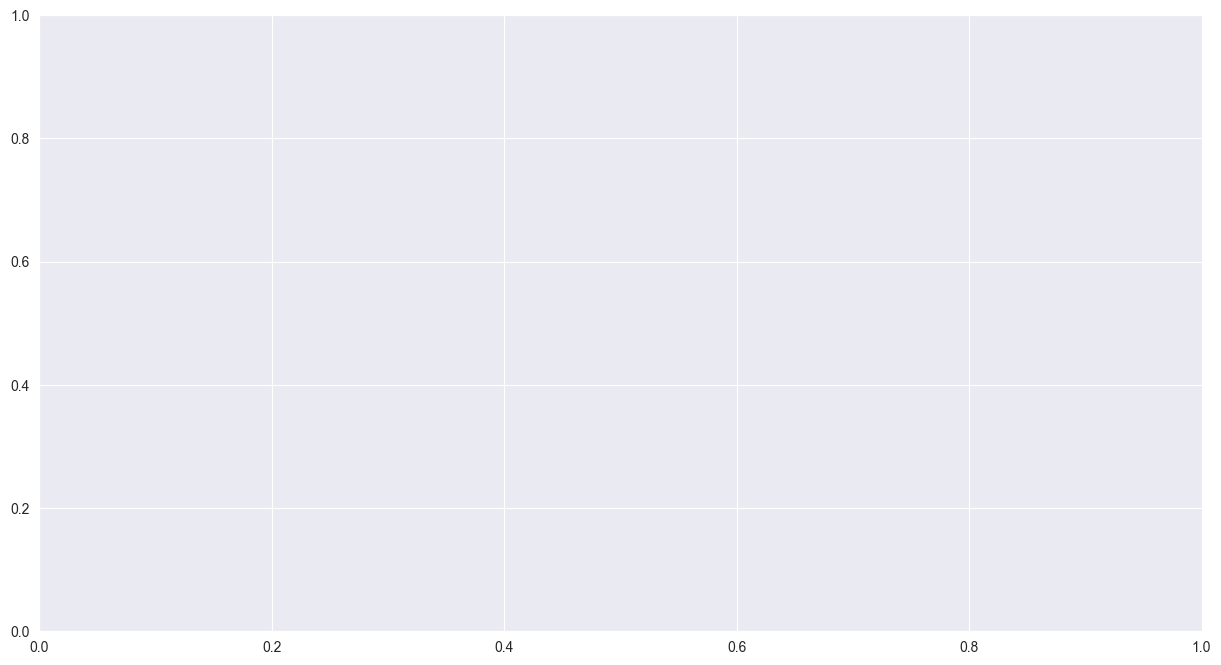

In [35]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,1,1) # (rows, columns, and location)
                        # this would create a 1x1 grid of subplots
                        # and choose axes #1

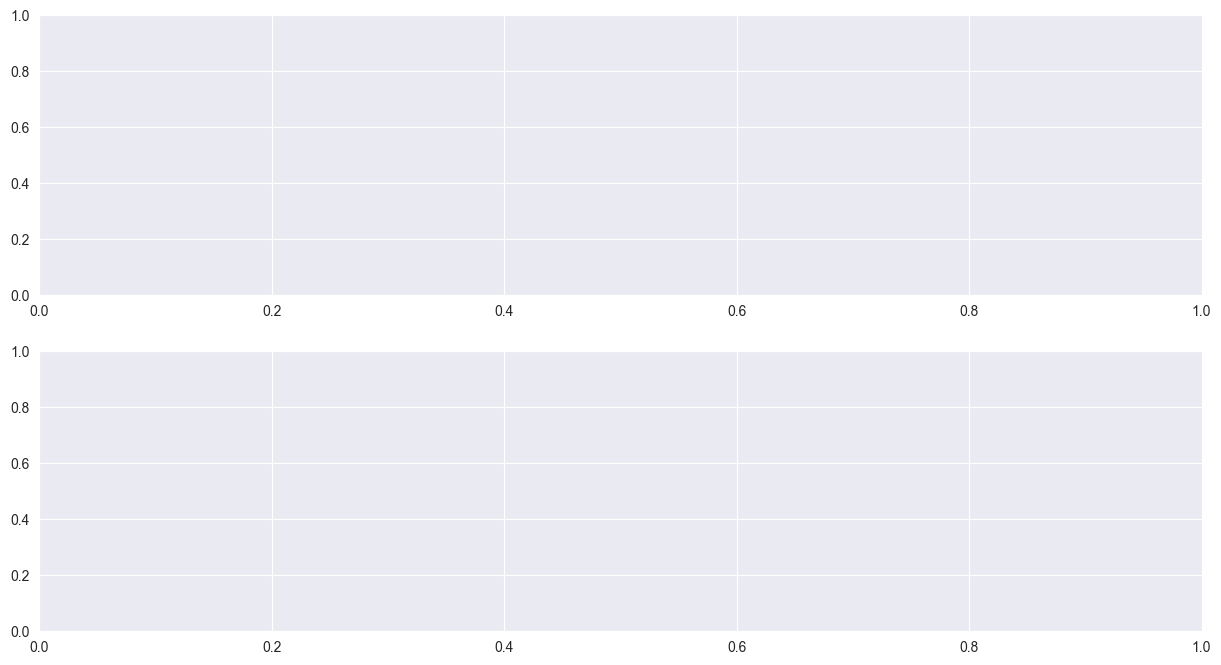

In [36]:
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(2,1,1) # this would create a 2x1 grid of subplots
                         # and choose axes #1
ax2 = plt.subplot(2,1,2) # this would create a 2x1 grid of subplots
                         # and choose axes #2

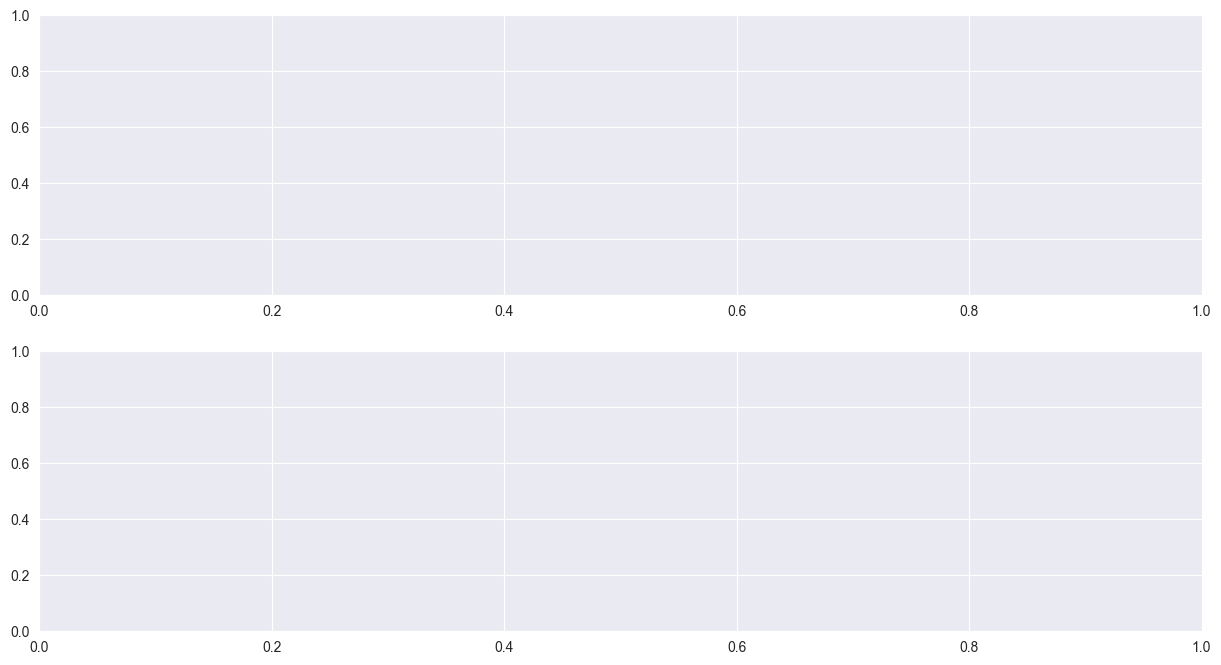

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15,8)) # This creates a figure of size 15x8 with
                                             # a 2x1 grid of subplots.

In order to call the individual subplots with the above method, use an indexer `ax[i]` or `ax[i][j]`

<Axes: >

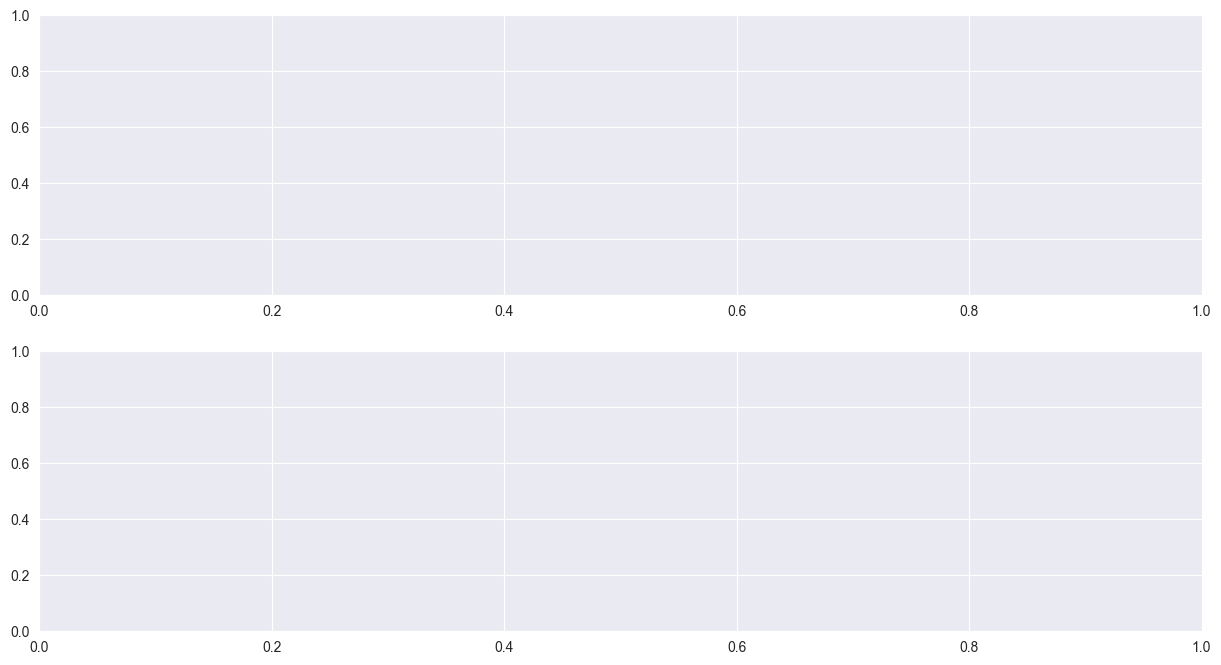

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(15,8)) # This creates a figure of size 15x8 with
                                             # a 2x1 grid of subplots.
ax[0] # The top axes
ax[1] # The bottom axes

Let's begin with our first plot.

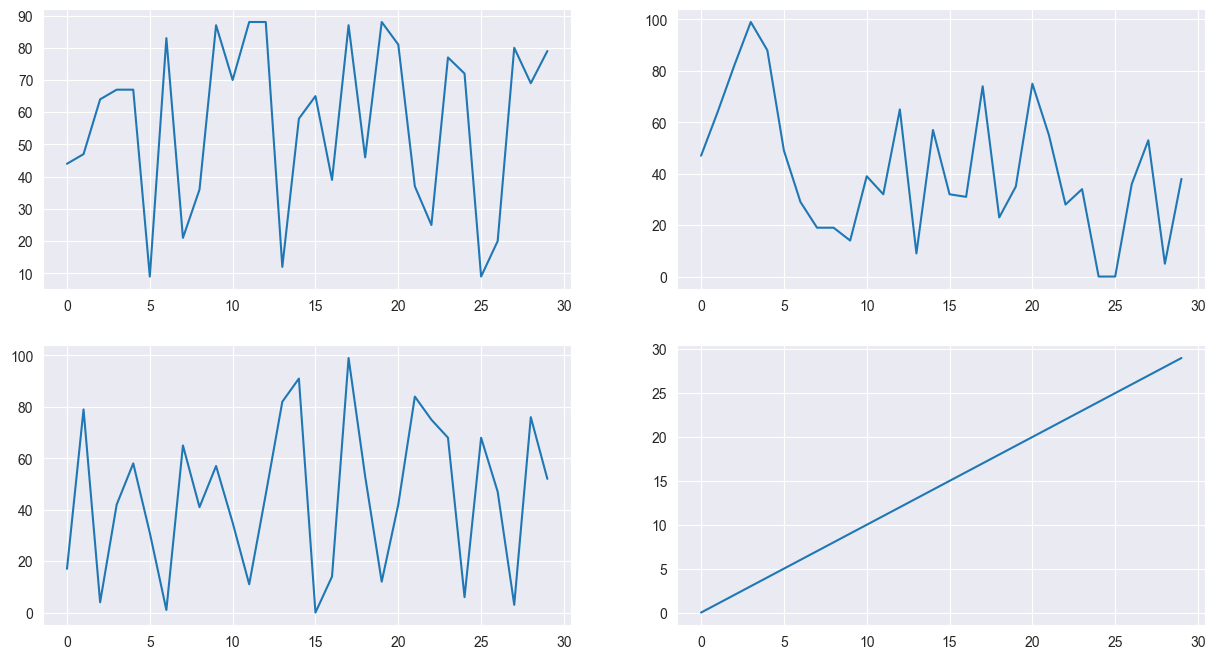

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(15,8)) # This creates a figure of size 15x8 with
                                             # a 2x1 grid of subplots.

ax[0][0].plot(df.index.values, df['a']) # The top-left axes
ax[0][1].plot(df.index.values, df['b']) # The top-right axes
ax[1][0].plot(df.index.values, df['c']) # The bottom-left axes
ax[1][1].plot(df.index.values, range(len(df))) # The bottom-right axes

<a id="3"></a> <br>
# 3. LINE PLOTS

Line graphs can be called as a method of a subplot (pair of axes):<br>
`ax.plot(x, y)`

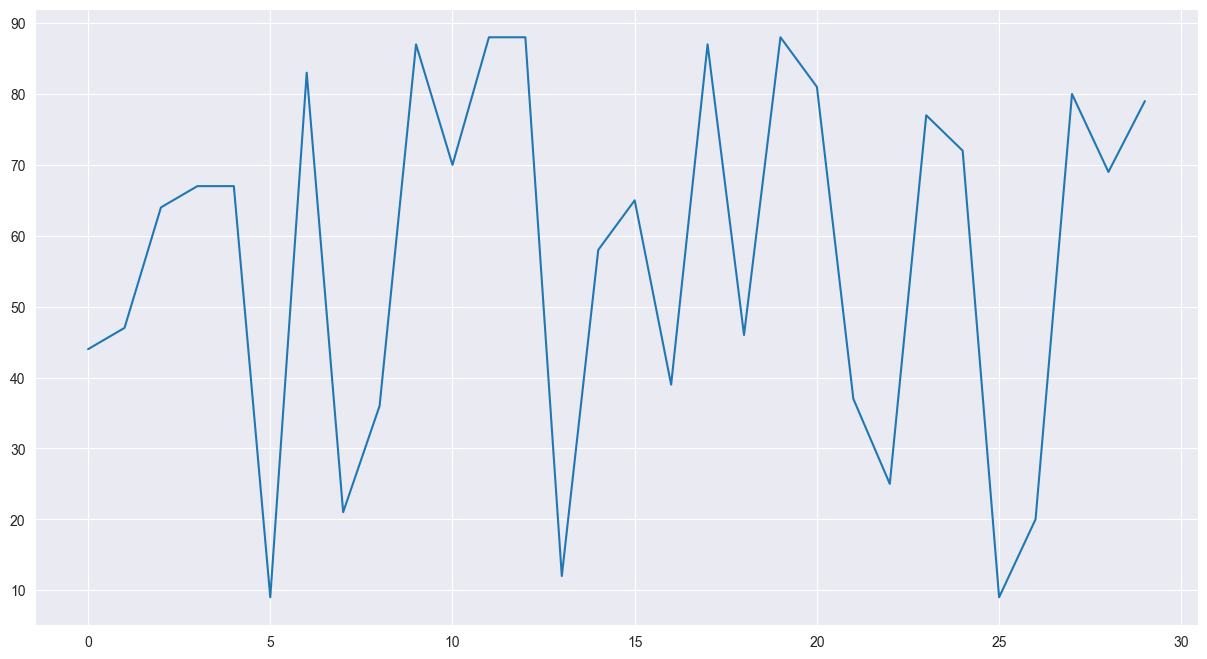

In [40]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

x = df.index.values # The index the dataframe we created up above. Equivalent to [0, 1, ..., 28, 29]
y = df['a'] # Column 'a' from df.

ax.plot(x, y)

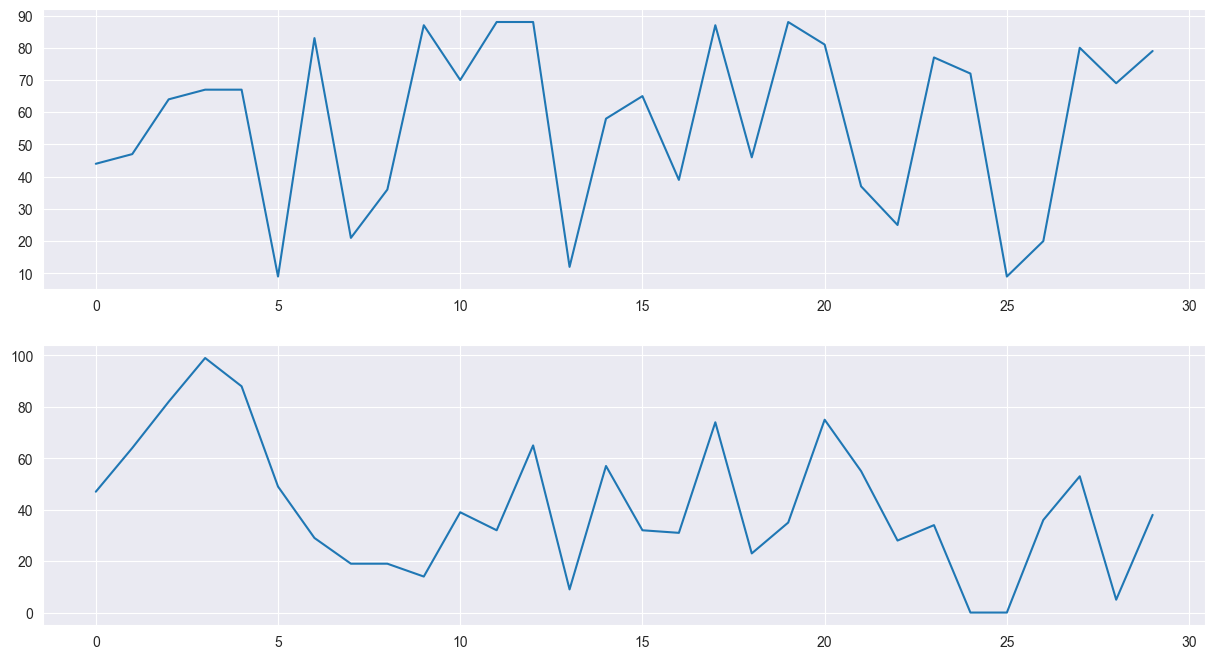

In [41]:
# The above plot can be generated without creating the variables
# x and y by passing the values directly to the function.

fig, ax = plt.subplots(2,1, figsize=(15,8))

ax[0].plot(df.index.values, df['a'])
ax[1].plot(df.index.values, df['b'])

We can also create multiple lines on the same axes. To do this, you just call the `ax.plot()` function multiple times.

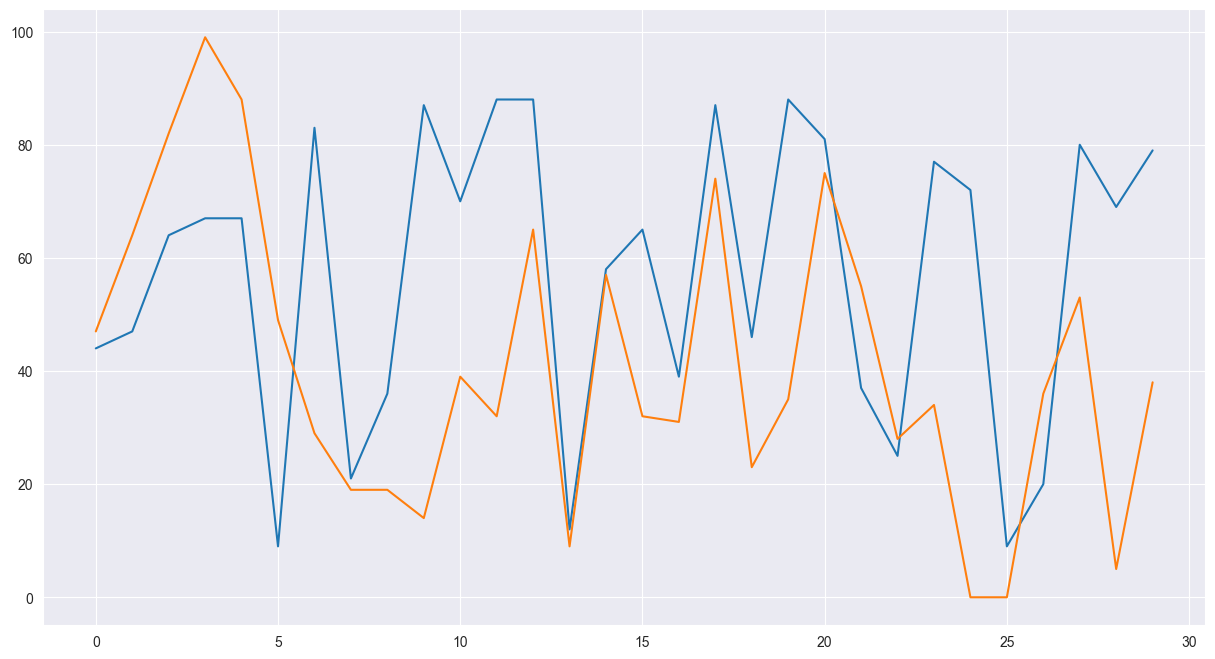

In [42]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

x = df.index.values # The index the dataframe we created up above. Equivalent to [0, 1, ..., 28, 29]
y1 = df['a'] # Column 'a' from df.
y2 = df['b'] # Column 'a' from df.

ax.plot(x, y1)
ax.plot(x, y2)

At this point it's worth mentioning a convenient function that makes our plots much prettier without having to configure them. This function is `seaborn.set_style('darkgrid')` from the library seaborn.

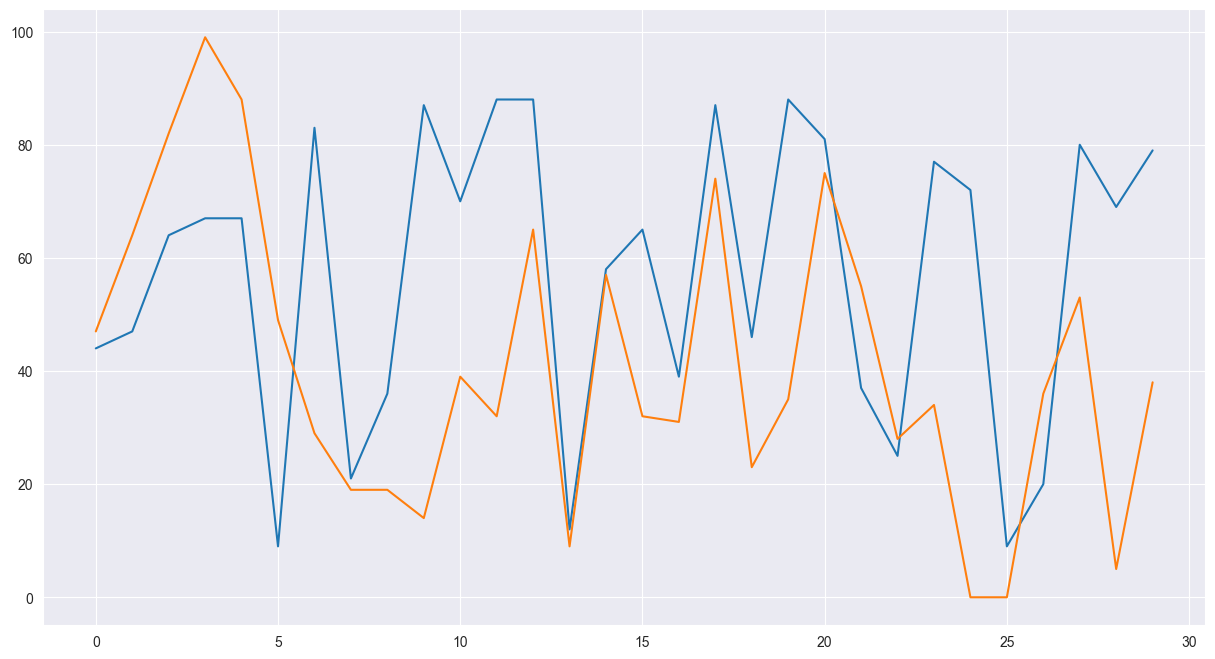

In [43]:
sns.set_style('darkgrid') # setting the plotting style
                          # we only need to call this once,
                          # usually before we start plotting.

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(df.index.values, df['a'])
ax.plot(df.index.values, df['b'])

The `plot()` function has many *keyword arguments*, or *kwargs*. Some of the important ones include:
- `color` sets line color
- `linewidth` or `lw` sets line width
- `linestyle` or `ls` sets line style. Possible values include `'-'` (solid line), `'-.'` (dot-dash), `'--'` (dashed).
- `marker` creates points for each of the individual data points in the line graph. Possible values for `marker` include `'o'` (circles), `'s'` (squares), etc.

Let's see some examples.

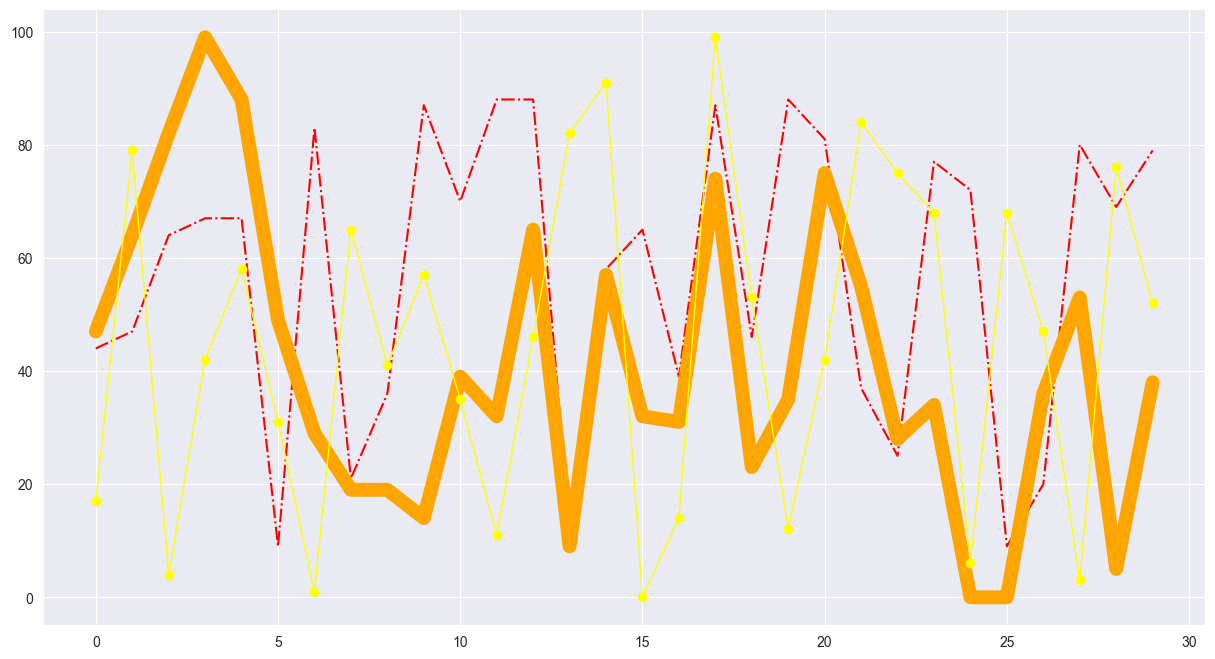

In [44]:
sns.set_style('darkgrid') # setting the plotting style

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(df.index.values, df['a'], color='red', ls='-.')
ax.plot(df.index.values, df['b'], color='orange', lw=10)
ax.plot(df.index.values, df['c'], color='yellow', lw=1, marker='o')

#### Legends
It can be a bit hard to tell apart all of the lines, so let's add a legend.
The `ax.legend()` function reads the `label` arguments from previous function calls on a given axes, and automatically generates a legend.<br>
Note that `ax.legend()` can take additional arguments.
- `loc` will specify the location of the legend. If you do not specify this argument, matplotlib will automatically choose the best location.
- `ncol` specifies the number of columns the legend will have.
- You can also create a completely custom axes legend by passing *patches* and *labels*, but we'll discuss that later.

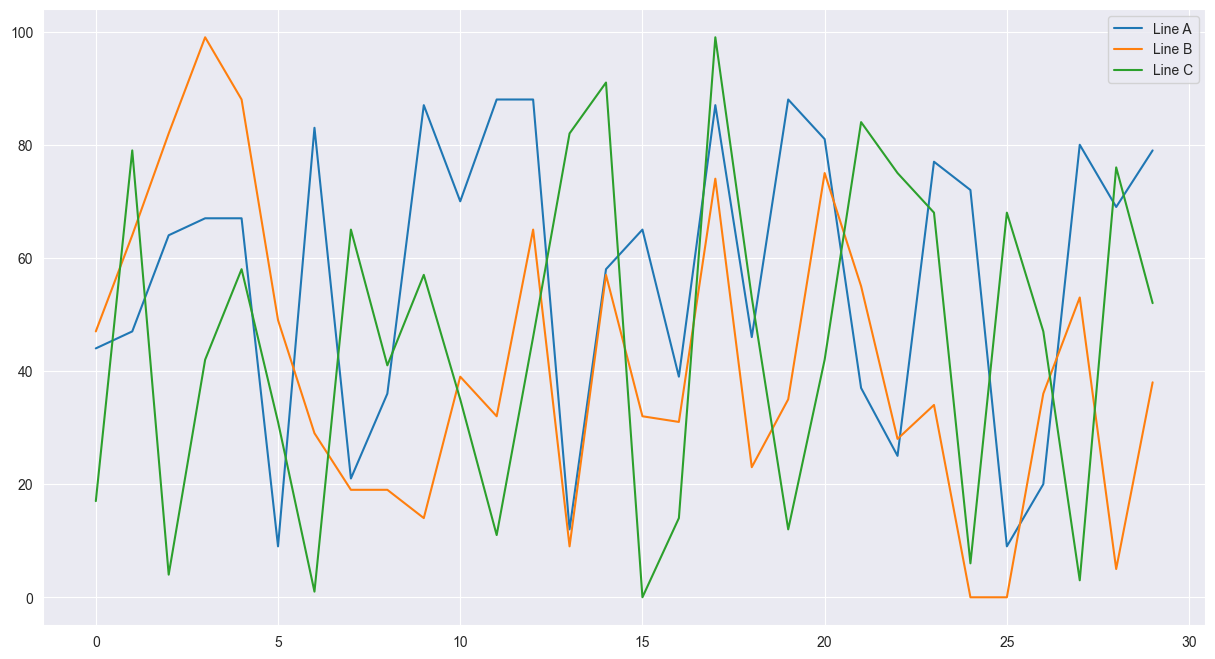

In [45]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

ax.plot(df.index.values, df['a'], label='Line A') # add the label
ax.plot(df.index.values, df['b'], label='Line B') # kwarg to each
ax.plot(df.index.values, df['c'], label='Line C') # function

ax.legend(loc='best') # and now call the ax.legend() function
            # it will read all of the labels from graphical
            # objects under ax

#### Combining Subplots with Line Graphs
To to draw lines on separate axes, call the `ax.plot()` function as a method of the axes you want to draw the line on.

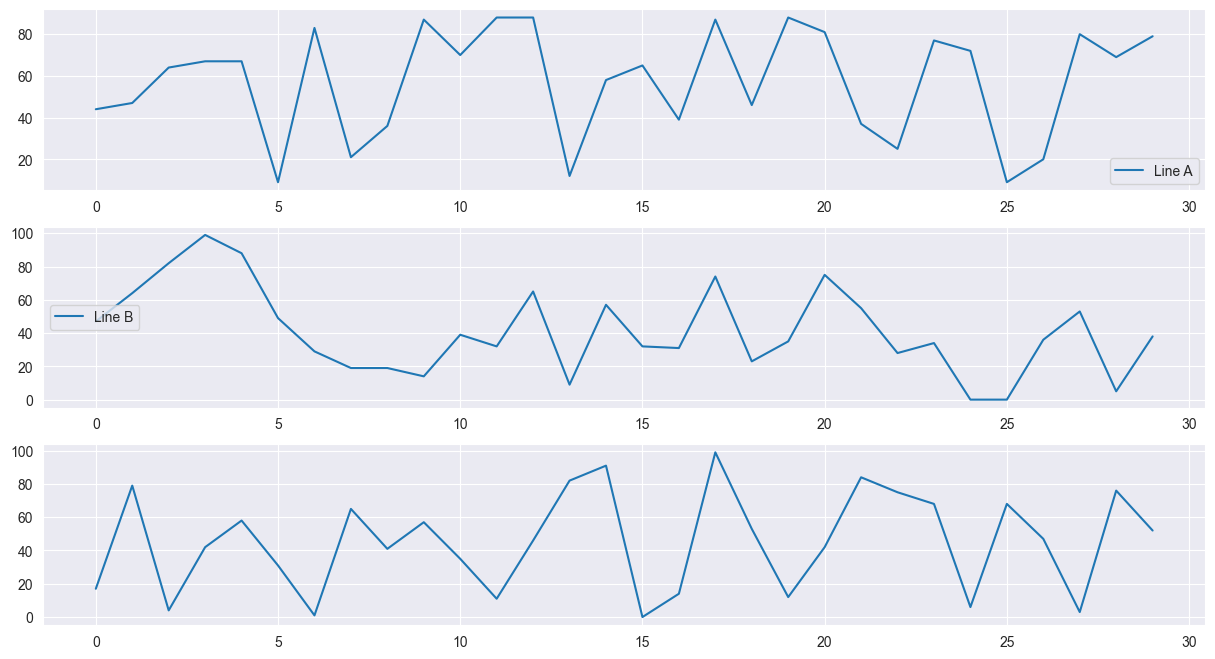

In [46]:
fig, ax = plt.subplots(3,1, figsize=(15,8))

ax[0].plot(df.index.values, df['a'], label='Line A') # Top
ax[1].plot(df.index.values, df['b'], label='Line B') # Middle
ax[2].plot(df.index.values, df['c'], label='Line C') # Bottom

ax[0].legend(loc=4) # This will create a legend for ax[0] in the bottom-right.
ax[1].legend(loc=6) # This will create a legend for ax[1] centre-left.

# Also note that all lines will default to the first color in the default color cycle--blue.

<a id="ex1"></a> <br>
### Exercise 1
Create a figure of size 15x8 with two subplots, top and bottom.<br>
Draw two lines in the top axes, one green and one orange.<br>
Add a legend for the top plot, *Green* and *Orange*. Put this legend in the top-middle of graph.<br>
**Extra Challenge**: In the bottom axes, create a graph of only the data points, marked by circles, but with no line connecting the points.

In [47]:
# Start your answer from here

Tips: If you want to check the sample answer, please check the following cell block.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


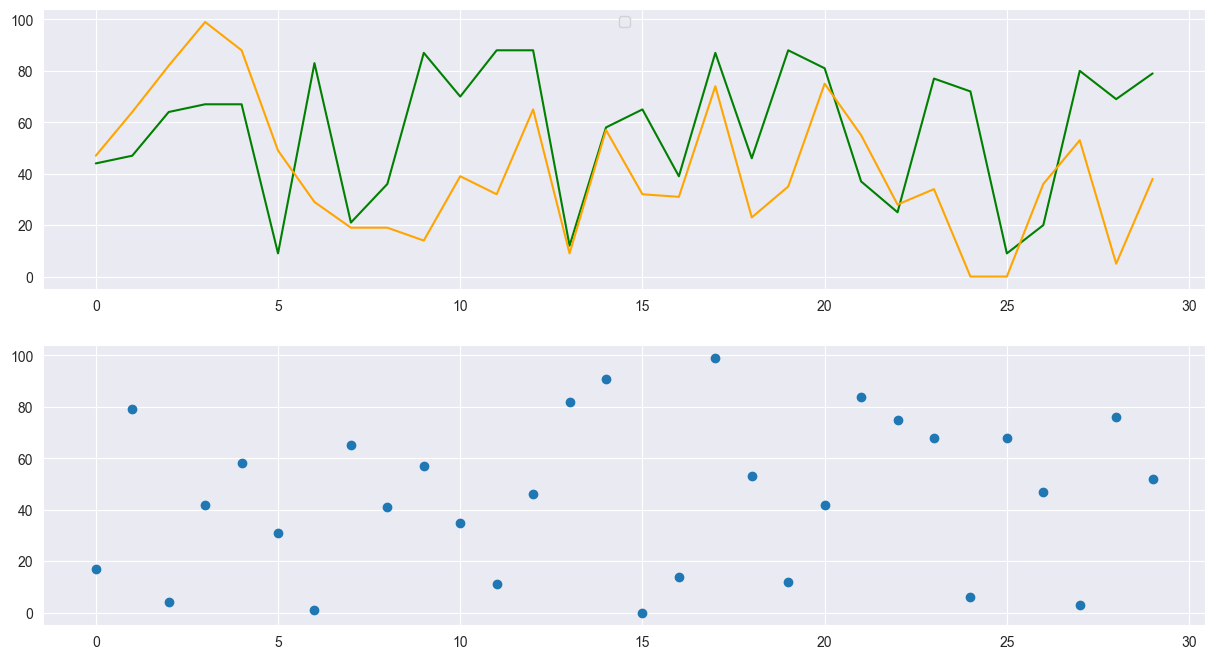

In [48]:
# My Sample Answer
fig, ax = plt.subplots(2, 1, figsize=(15,8))

ax[0].plot(df.index.values, df['a'], c='green')
ax[0].plot(df.index.values, df['b'], c='orange')
ax[0].legend(loc=9) # "9": upper center

ax[1].plot(df.index.values, df['c'], marker='o', lw=0) # set line width = 0, means no visuable line

<a id="4"></a> <br>
# 4. BAR PLOTS
The other common type of graph you will create is a bar graph.<br>
These can be created with the axes method `ax.bar(x, height)`.<br>

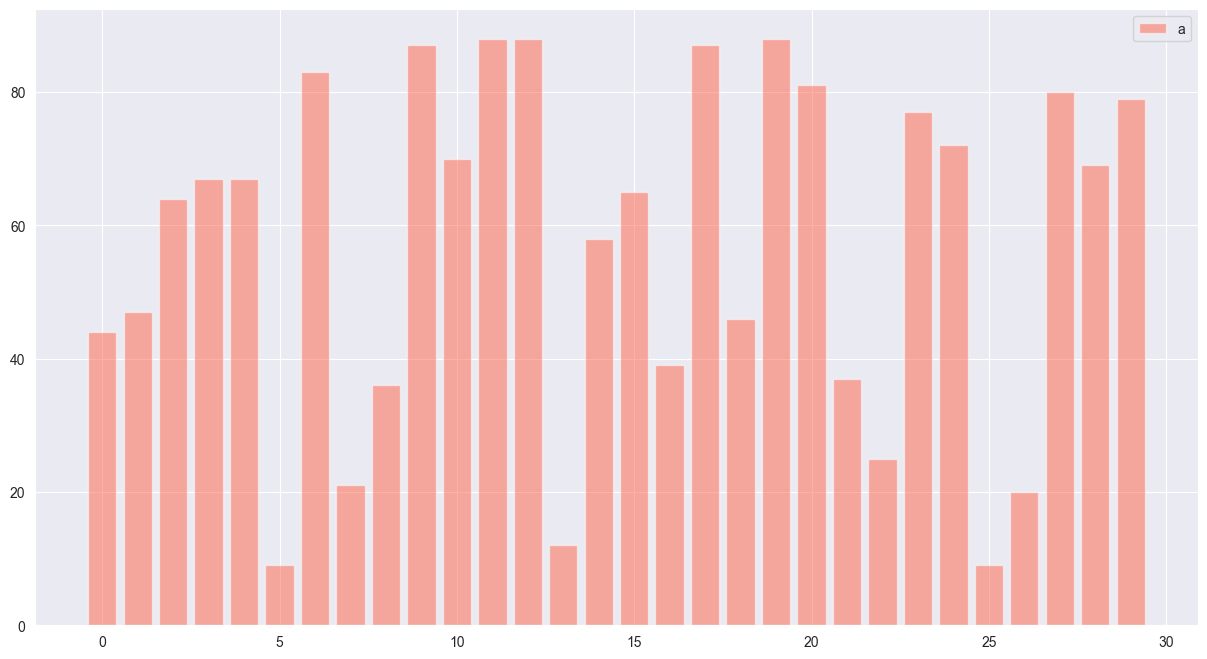

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

bar_kwargs = {'color':'tomato', 'alpha':0.5}

ax.bar(df.index.values, df['a'], label='a', **bar_kwargs)
ax.legend()

<a id="ex2"></a> <br>
### Exercise 2
Create a figure with three subplots, aligned vertically.<br>
Create a bar graph for a and b on the first two, but at the last one draw both a and b, but put b on top of a! (Hint: use the bottom argument in the bar function)<br>
Make sure the color for a and b are consistent in all the subplots!<br>
**Extra Challenge**: Write the magnitude of each bar on top of it

In [50]:
# Start your answer from here

Tips: If you want to check the sample answer, please check the following cell block.

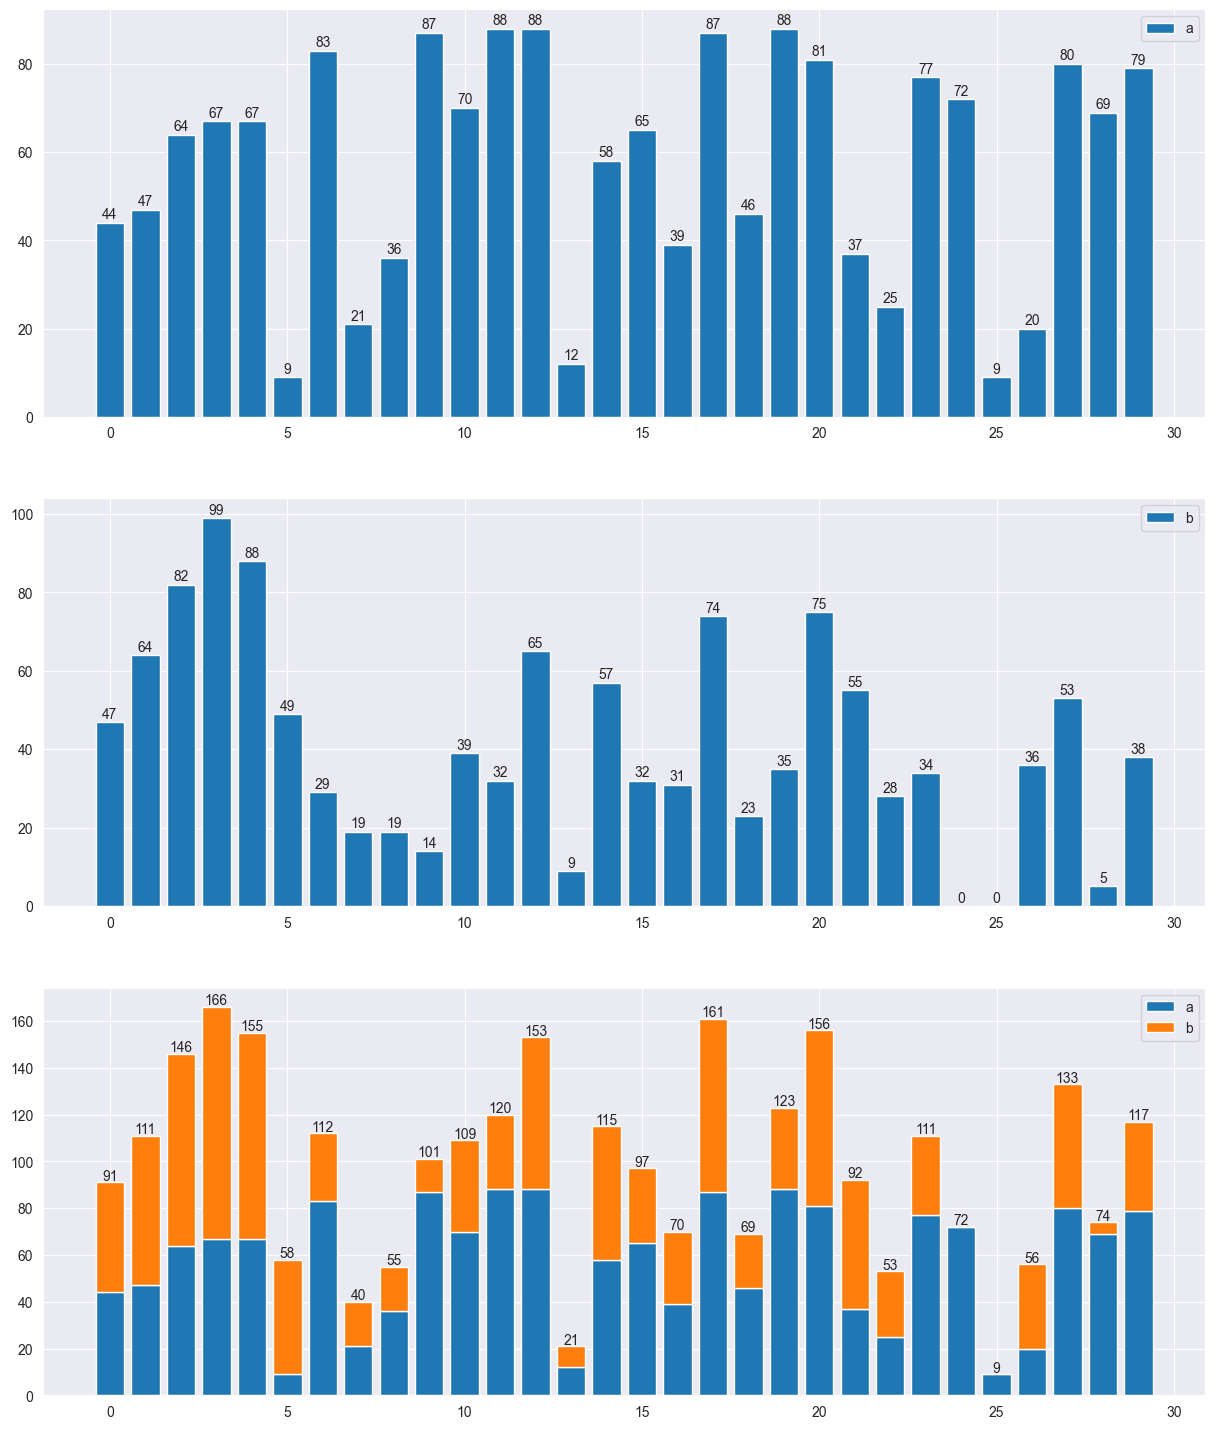

In [51]:
# My Sample Answer
fig, ax = plt.subplots(3, 1, figsize=(15,18))

ax[0].bar(df.index.values, df['a'])
for i in range(df.shape[0]):
    ax[0].text(i, df['a'][i]+1, df['a'][i], horizontalalignment='center')
ax[0].legend('a')
    
ax[1].bar(df.index.values, df['b'])
for i in range(df.shape[0]):
    ax[1].text(i, df['b'][i]+1, df['b'][i], horizontalalignment='center')
ax[1].legend('b')

ax[2].bar(df.index.values, df['a'])
ax[2].bar(df.index.values, df['b'], bottom=df['a'])
for i in range(df.shape[0]):
    ax[2].text(i, df['a'][i]+df['b'][i]+1, df['a'][i]+df['b'][i], horizontalalignment='center')
ax[2].legend(['a','b'])

<a id="5"></a> <br>
# 5. TICK LABELS AND AXES LABELS

Although matplotlib automatically assigns tick labels to your graph, it will not be enough to explain your results. <br>
Clarity of information is crucial in a graph and to do that we have options to modify tick labels and axes labels to how we see fit. <br>

`ax.set_title()`, `ax.set_xlabel()`, `ax.set_ylabel()`, `ax.set_xticklabels()`, `ax.set_yticklabels()` are the main tools here.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


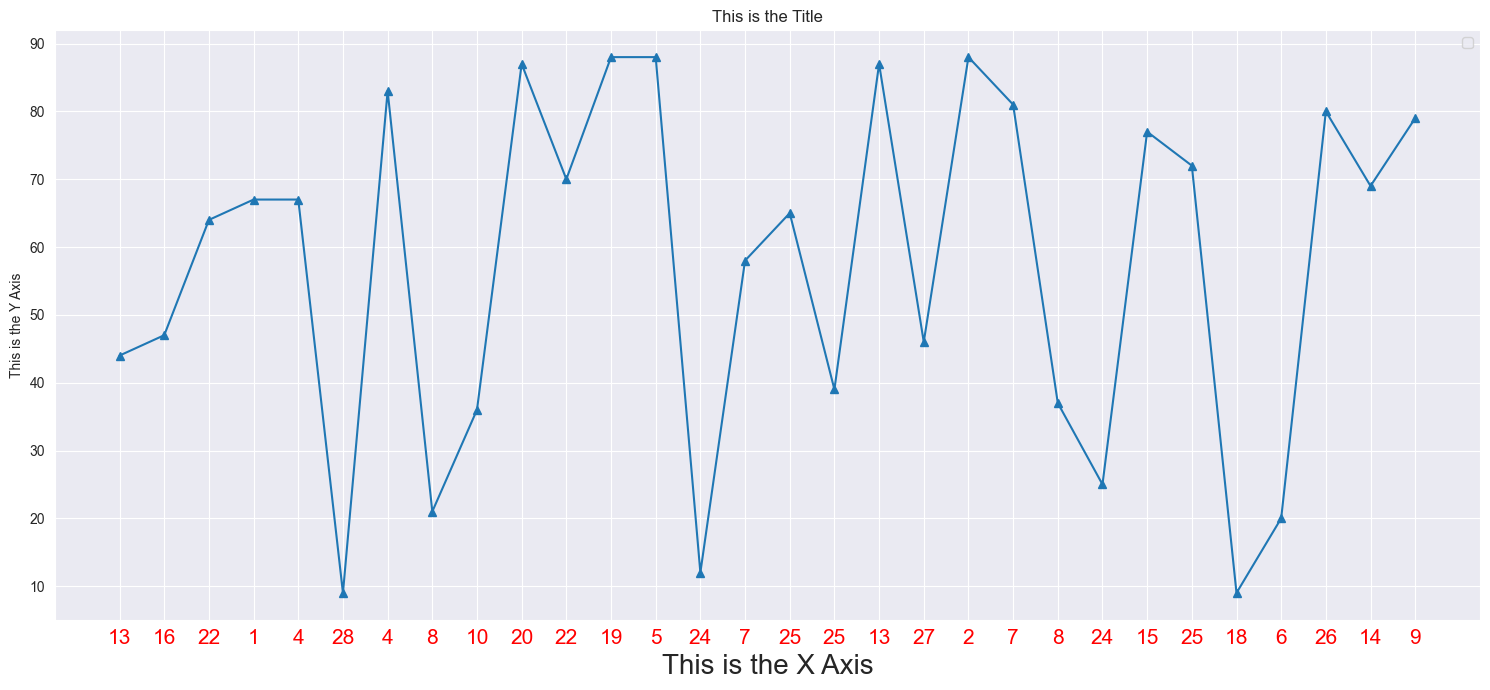

In [52]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df.index.values, df['a'], marker='^')
ax.set_title('This is the Title')
ax.set_ylabel('This is the Y Axis')
ax.set_xlabel('This is the X Axis', fontsize=20)

ax.set_xticks(df.index.values)
ax.set_xticklabels(np.random.randint(1,30,30), fontsize=15, color='red')

ax.legend()
fig.tight_layout()

<a id="ex3"></a> <br>
### Exercise 3
Visualize the mock data given below.<br>
Create bars to represent the turnover for each market.<br>
Keep in mind that showing too much information on a graph can be overwhelming, so do it with discretion !<br>
Use labels to make sure your audience understands the graph.<br>
**Extra Challenge**:  On the opposite axis, draw a line to show each market share. (Hint: use `ax.twinx()`)

In [53]:
# mock data
np.random.seed(0)

turnover_data = pd.DataFrame({'boardid' : ['DAY', 'DAY_X', 'DAY_U', 'TSE'], 
                              'turnover' : np.random.randint(1e6, 1e9, 4)})

# sort by turnover value
turnover_data = turnover_data.sort_values(by='turnover').reset_index().drop('index', axis=1)

# convert value to Million unit for easy-reading
turnover_data['turnover_simplified'] = turnover_data['turnover'] // 1000000

# market share
turnover_data['market_share'] = round((turnover_data['turnover'] / sum(turnover_data['turnover'])*100), 1)

turnover_data

,boardid,turnover,turnover_simplified,market_share
0,DAY,210652396,210,10.8
1,DAY_X,399764591,399,20.6
2,TSE,405868288,405,20.9
3,DAY_U,925231285,925,47.7


In [54]:
# Start your answer from here

Tips: If you want to check the sample answer, please check the following cell block.

C:\Users\Andrew\AppData\Local\Temp\ipykernel_33184\1145755333.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(turnover_data['boardid'], fontsize=15);
C:\Users\Andrew\AppData\Local\Temp\ipykernel_33184\1145755333.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([str(x/1000000)+'M' for x in vals])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_33184\1145755333.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(x)+'%' for x in vals]);


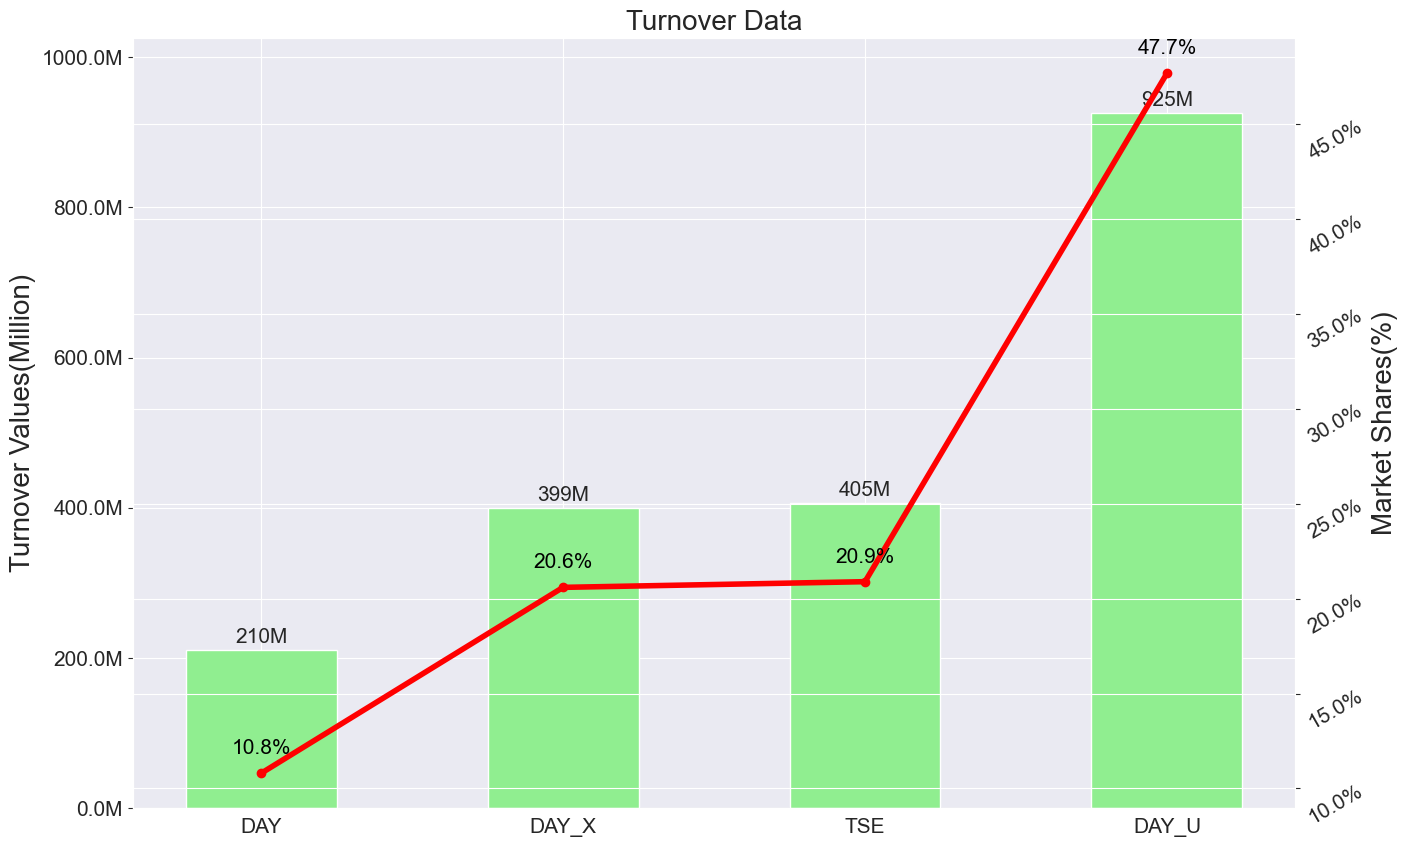

In [55]:
# My Sample Answer
fig, ax1 = plt.subplots(figsize=(15,10))

ax1.bar(turnover_data['boardid'], turnover_data['turnover'], width=0.5, color='lightgreen')
for i in range(turnover_data.shape[0]):
    ax1.text(turnover_data['boardid'][i], turnover_data['turnover'][i]+1e7, str(turnover_data['turnover_simplified'][i])+'M', fontsize=15, horizontalalignment='center')

ax1.set_title('Turnover Data', fontsize=20)
ax1.set_xticklabels(turnover_data['boardid'], fontsize=15);

ax1.tick_params(labelsize=15, axis='y')

ax1.set_ylabel('Turnover Values(Million)', fontsize=20)
ax1.set_ylim(0, max(turnover_data['turnover']+1e8))

# Format ax1 y axis - method 1
vals = ax1.get_yticks()
ax1.set_yticklabels([str(x/1000000)+'M' for x in vals])


ax2 = ax1.twinx()
ax2.plot(turnover_data['boardid'], turnover_data['market_share'], c='red', lw=4, marker='o')
for i in range(turnover_data.shape[0]):
    ax2.text(turnover_data['boardid'][i], turnover_data['market_share'][i]+1, str(turnover_data['market_share'][i])+'%', fontsize=15, horizontalalignment='center', color='black')

ax2.set_ylabel('Market Shares(%)', fontsize=20)
ax2.tick_params(labelsize=15, axis='y', rotation=30)

# Format ax2 y asix - method 1
# ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y/100)))

# Format ax2 y asix - method 2
vals = ax2.get_yticks()
ax2.set_yticklabels([str(x)+'%' for x in vals]);

# CONCLUSION

Thank you for your votes and comments. 

If you have any questions or suggests, please feel free to message me.